# imports

In [ ]:
# load and autoreload
from IPython import get_ipython


# this automatically updates changes in other file's funcionts. 
# it is very handy for data exploration
try:
    _magic = get_ipython().run_line_magic
    _magic('load_ext', 'autoreload')
    _magic('autoreload', '2')
except:
    pass


# import most used packages
# import os
# import glob
# import sys
# import pprint
# import datetime as dt
# import pandas as pd
import numpy as np
# import matplotlib as mpl
# import matplotlib.colors
import matplotlib.pyplot as plt 
# import xarray as xr
# import seaborn as sns
# import cartopy as crt

In [ ]:
# import bnn_tools

In [ ]:
# import customs functions

import bnn_tools.funs as fu
import bnn_tools.bnn_array

# open sum nais file 

In [ ]:
p = '../example_data/NAISn20220515np.sum'
# dataset (xarray) of the sum data. 
ds = fu.open_sum2ds(p)

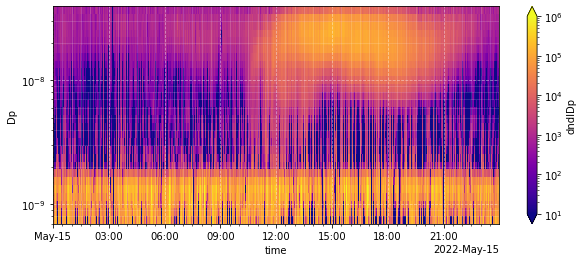

In [ ]:
ds.bnn.plot_psd()

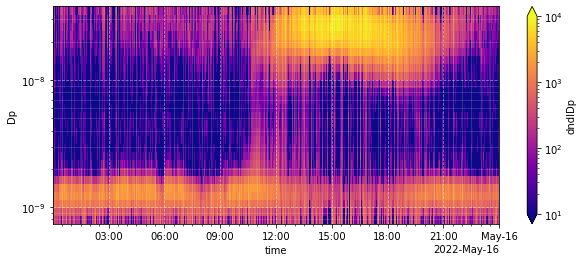

In [ ]:
p = '../example_data/NAISn20220515nds.sum'

# dataset (xarray) of the sum data. 
ds_ineg = fu.open_sum2ds(p)

ds_ineg.bnn.plot_psd(vmax=1e4)

In [ ]:
s1 = dict(a=1,b=2)

s2 = dict(a=3,c=4)

In [ ]:
s1.update(s2)
s1

{'a': 3, 'b': 2, 'c': 4}

# resample time in a file

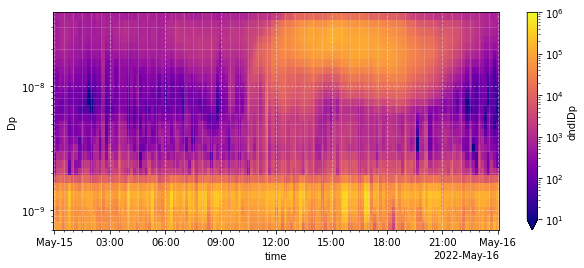

In [ ]:
ds1 = ds.bnn.resample_ts(600)

ds1.bnn.plot_psd()

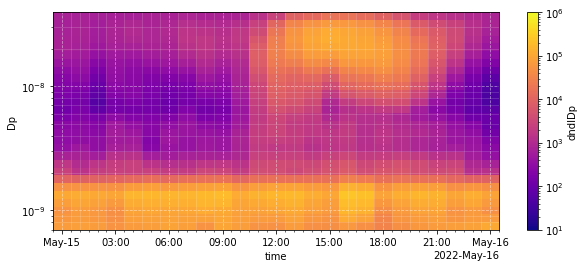

In [ ]:
ds1 = ds.bnn.resample_ts(3600)

ds1.bnn.plot_psd()

# regridding

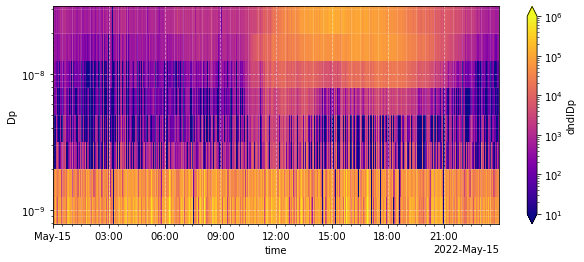

In [ ]:
ds3 = ds.bnn.dp_regrid(10,.2)
ds3.bnn.plot_psd()

# get N from psd

In [ ]:
N, d1,d2 = ds.bnn.get_N(0,1)

In [ ]:
# it also gives you the actual limits for the particle size. 
d1,d2

(7.49894209332454e-10, 3.6517412725483806e-08)

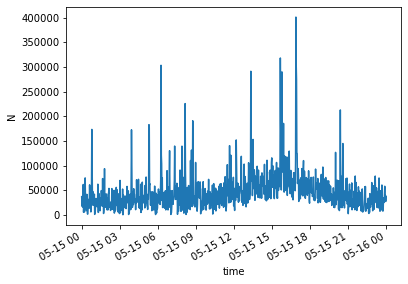

In [ ]:
N.plot()

# open psm file 

you need to check with magda the specifications of the psm inversion file 

In [ ]:
pp = '../example_data/izanapsm2022_inv_kernel_20220515.dat'

In [ ]:
ds_psm = fu.open_psm2ds(pp)

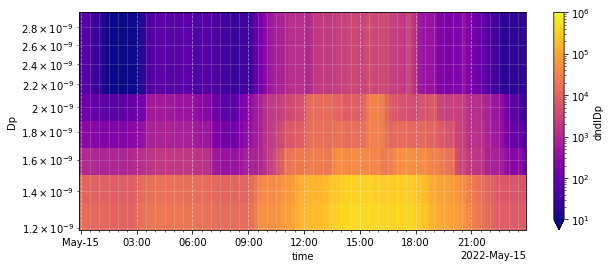

In [ ]:
ds_psm.bnn.plot_psd()

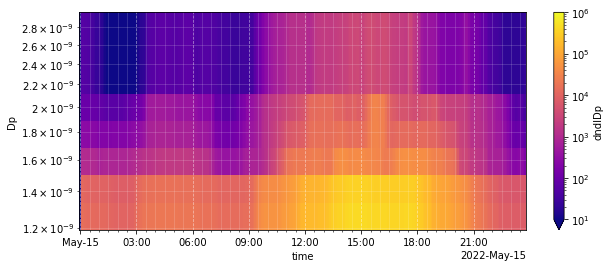

In [ ]:
ds_psm.bnn.upsample_ts(300).bnn.plot_psd()

In [ ]:
# be careful when upsampling or downsampling. here an error
ds_psm.bnn.upsample_ts(900).bnn.plot_psd()

AssertionError: you are trying to upsample when you should be downsampling

# open smsp 

In [ ]:
p3 = '../example_data/202205101400_SMPS.txt'

In [ ]:
ds_s = fu.open_smps2ds(p3).loc[{'time':'2022-05-15'}]

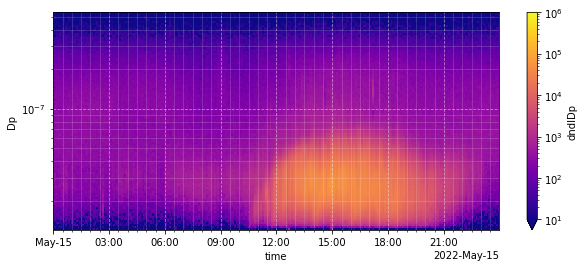

In [ ]:
ds_s.bnn.plot_psd()

# combine two along DP

In [ ]:
ts = 300
dpr = .05
Dp_cut = 3e-9
Dp_cut1 = 20e-9


dsn1 = ds.bnn.resample_ts(ts)[['dndlDp']]

dsn2 = dsn1.bnn.dp_regrid(10,dpr)

dsp1 = ds_psm.bnn.upsample_ts(ts).bnn.set_Dp()

dsp2 = dsp1.bnn.dp_regrid(10,dpr)


dss1 = ds_s.bnn.upsample_ts(ts)[['dndlDp']]


dss2 = dss1.bnn.dp_regrid(10,dpr)

In [ ]:
dss2

<xarray.Dataset>
Dimensions:  (lDp: 33, time: 288)
Coordinates:
  * time     (time) datetime64[ns] 2022-05-15 ... 2022-05-15T23:55:00
  * lDp      (lDp) float64 -7.9 -7.85 -7.8 -7.75 -7.7 ... -6.45 -6.4 -6.35 -6.3
Data variables:
    dndlDp   (lDp, time) float64 nan 13.61 3.977 5.703 ... 5.066 6.859 4.104

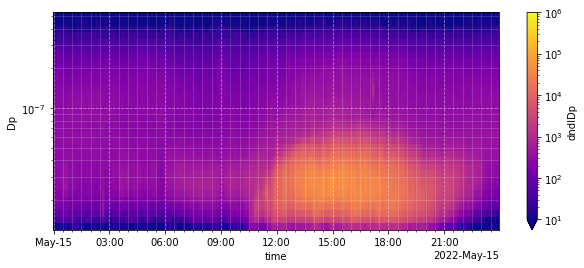

In [ ]:
dss2.bnn.plot_psd()

In [ ]:
dc = fu.combine_2_spectras(dsp2,dsn2,cut_dim='lDp',cut_point=np.log10(Dp_cut))

dc1 = fu.combine_2_spectras(dc,dss2,cut_dim='lDp',cut_point=np.log10(Dp_cut1))

In [ ]:
dsp2

<xarray.Dataset>
Dimensions:  (lDp: 8, time: 286)
Coordinates:
  * time     (time) datetime64[ns] 2022-05-15 ... 2022-05-15T23:45:00
  * lDp      (lDp) float64 -8.9 -8.85 -8.8 -8.75 -8.7 -8.65 -8.6 -8.55
Data variables:
    dndlDp   (lDp, time) float64 nan 1.427e+04 1.351e+04 ... 20.33 20.92 21.68

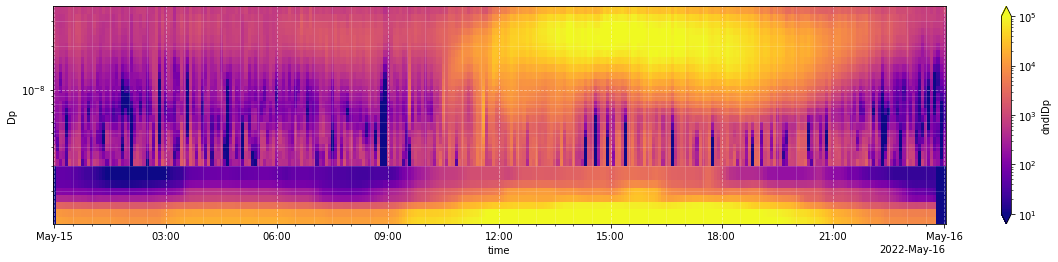

In [ ]:
dc.bnn.plot_psd(vmax=1e5)
f = plt.gcf()
f.set_figwidth(20)

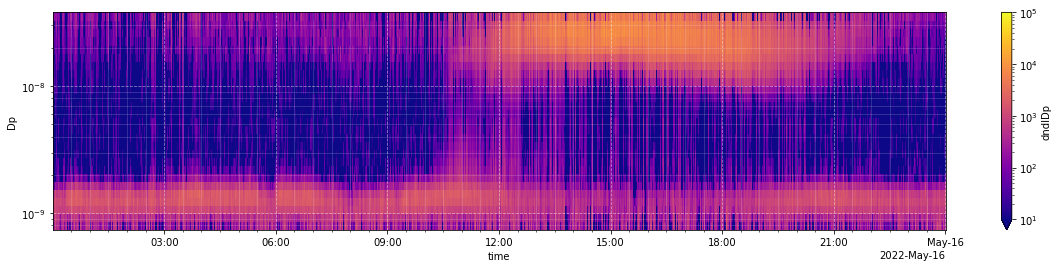

In [ ]:
ds_ineg.bnn.plot_psd(vmax=1e5)
f = plt.gcf()
f.set_figwidth(20)

# combine two files along Time 

# filters

# plot